<a href="https://colab.research.google.com/github/preenet/961701_65/blob/main/961701_week4_5_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Demonstrate to student using pandas to perform data pre-processing
# pree.t@cmu.ac.th 
# 7/23/2022, 7/30/2022
# in this notebook you will learn basic EDA with using adult dataset as example
# 1. Connect to google drive
# 2. Read csv file
# 3. Peek at the dataset
# 4. Dimensions of Your Data.
# 5. Data Types.
# 6. Class Distribution.
# 7. Data Summary.
# 8. All the plots

## 1. Connect to google drive

In [2]:
import pandas as pd

In [3]:

# We need to connect to the google drive, so that we can load the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# here, we change working directory to the location we want
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


# 2. Read csv file

In [5]:
# read the file and assign the header
df = pd.read_csv("week3_1.data", names=['workclass', 'fnlwgt', 'age', 'edu-num', 'education', 'occupation', 'relationship', 'race', 'sex', 'cap-gain', 'cap-loss', 'hours-per-week', 'native-country', 'target'])

# 3. Quick peek

In [6]:
# quick peek of the dataset how it looks like
df.head()

,workclass,fnlwgt,age,edu-num,education,occupation,relationship,race,sex,cap-gain,cap-loss,hours-per-week,native-country,target
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# 3. Understand data type

In [7]:
# lets look the type of data
df.dtypes

workclass         object
fnlwgt             int64
age               object
edu-num            int64
education         object
occupation        object
relationship      object
race              object
sex               object
cap-gain           int64
cap-loss           int64
hours-per-week     int64
native-country    object
target            object
dtype: object

In [8]:
# lets' look the dimension of the dataset
df.shape

(32561, 14)

# 5. Descriptive stat

In [9]:
# Descriptive statistics can provide a wealth of information about the nature of each feature.
df.describe()

,fnlwgt,edu-num,cap-gain,cap-loss,hours-per-week
count,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
# now, we look at class distribution (classification task)
df.groupby('target').size()

target
 <=50K    24720
 >50K      7841
dtype: int64

In [11]:
# we can see that we have class imbalance problem now 1:3, we will discuss how to remedy later.
# pandas is pretty neat such that we can also look for correlation between attributes.
df.corr(method="pearson")

,fnlwgt,edu-num,cap-gain,cap-loss,hours-per-week
fnlwgt,1.000000,-0.043195,0.000432,-0.010252,-0.018768
edu-num,-0.043195,1.000000,0.122630,0.079923,0.148123
cap-gain,0.000432,0.122630,1.000000,-0.031615,0.078409
cap-loss,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,-0.018768,0.148123,0.078409,0.054256,1.000000


In [12]:
# Many machine learning algorithms assume a Gaussian distribution, so need to check (the closer to zero the less skew)
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


fnlwgt             1.446980
edu-num           -0.311676
cap-gain          11.953848
cap-loss           4.594629
hours-per-week     0.227643
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe230fabd10>,
      dtype=object)

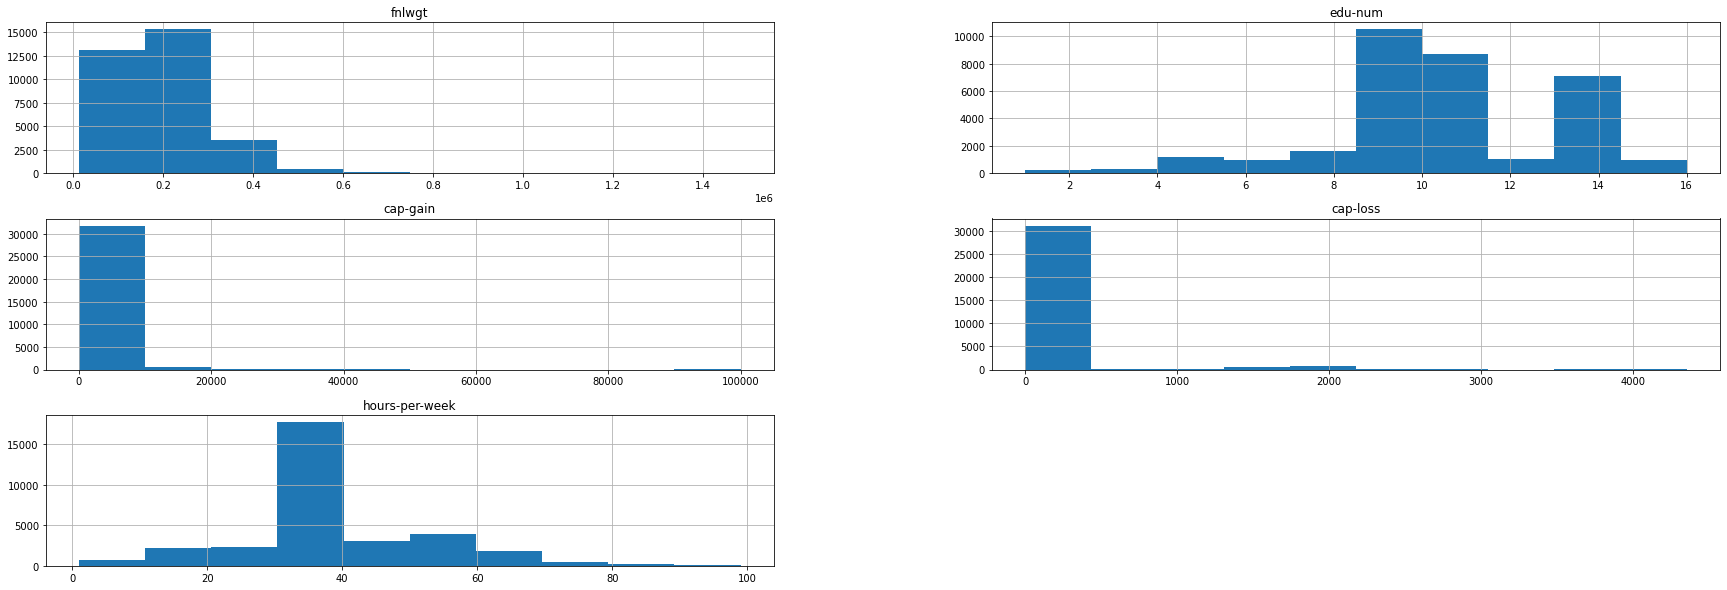

In [13]:
# visualzation can be used to understand your data (e.g., to get an idea of the distribution of each attribute is to look at histograms.)

df.hist(figsize=(30, 10))

fnlwgt               AxesSubplot(0.125,0.71587;0.168478x0.16413)
edu-num           AxesSubplot(0.327174,0.71587;0.168478x0.16413)
cap-gain          AxesSubplot(0.529348,0.71587;0.168478x0.16413)
cap-loss          AxesSubplot(0.731522,0.71587;0.168478x0.16413)
hours-per-week      AxesSubplot(0.125,0.518913;0.168478x0.16413)
dtype: object

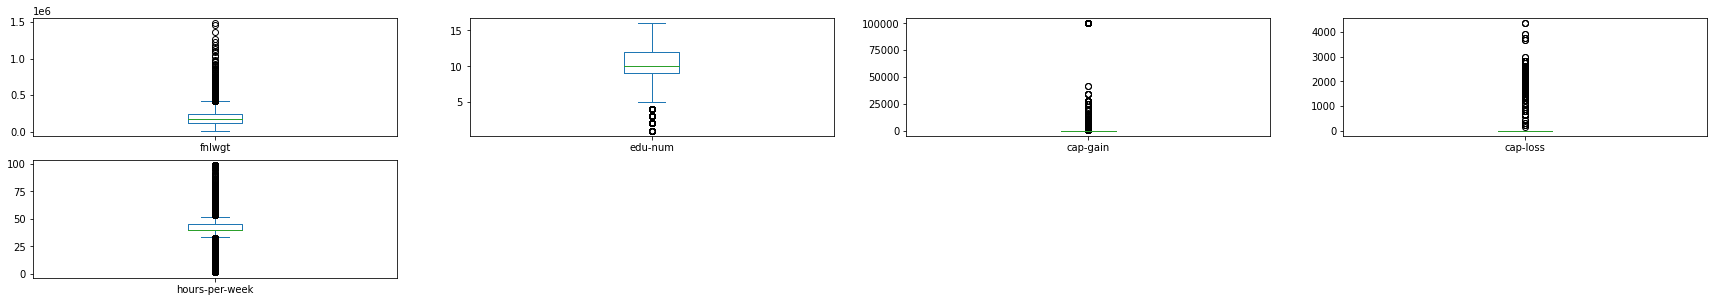

In [14]:
df.plot(figsize=(30, 10), kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2243a3850>,
      dtype=object)

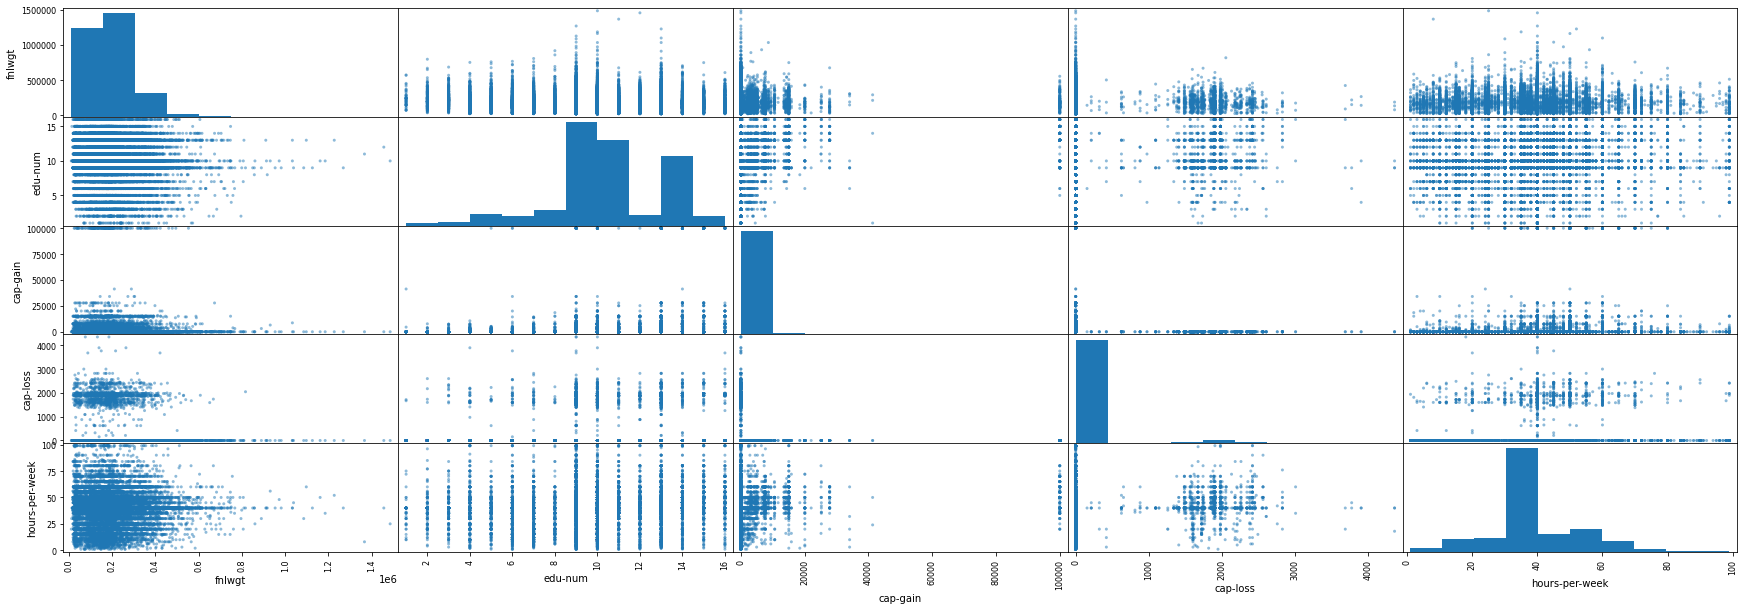

In [15]:
# Scatter plots are helpful for identifying structured relationships between variables, such as if two variables may be related to one another by a linear line.
import pandas
from pandas.plotting import scatter_matrix
scatter_matrix( df, figsize=(30, 10))

# Data Transfromation - One-hot for norminal

In [16]:
# assumed that you already have cleaned the data, we now perform one-hot encoding for nominal data
df = pd.get_dummies(df, prefix='workclass', columns=['workclass'], drop_first=False)

In [17]:
 # quick peek at the result 
df.head()

,fnlwgt,age,edu-num,education,occupation,relationship,race,sex,cap-gain,cap-loss,...,target,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay
39,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,...,<=50K,0,0,0,0,0,0,0,1,0
50,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,...,<=50K,0,0,0,0,0,0,1,0,0
38,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,...,<=50K,0,0,0,0,1,0,0,0,0
53,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,...,<=50K,0,0,0,0,1,0,0,0,0
28,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,...,<=50K,0,0,0,0,1,0,0,0,0


In [18]:
# do the same with the rest of nominal features
df = pd.get_dummies(df, prefix='age', columns=['age'], drop_first=False)
df = pd.get_dummies(df, prefix='education', columns=['education'], drop_first=False)
df = pd.get_dummies(df, prefix='occupation', columns=['occupation'], drop_first=False)
df = pd.get_dummies(df, prefix='relationship', columns=['relationship'], drop_first=False)
df = pd.get_dummies(df, prefix='race', columns=['race'], drop_first=False)
df = pd.get_dummies(df, prefix='sex', columns=['sex'], drop_first=False)
df = pd.get_dummies(df, prefix='native-country', columns=['native-country'], drop_first=False)

In [19]:
df.head()

,fnlwgt,edu-num,cap-gain,cap-loss,hours-per-week,target,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
39,77516,13,2174,0,40,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
50,83311,13,0,0,13,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
38,215646,9,0,0,40,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
53,234721,7,0,0,40,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
28,338409,13,0,0,40,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# we also need to transform the target to one hot
df['target'] = df['target'].astype('category').cat.codes

# Data Transfromation - Rescale using min max algo.

In [21]:
# see... now we have 108 features which may cause bad predictive performace. (we might need to go back and using domain expert to initial select again)
# but lets continue real fast, lets deal with the attributes with varying scales, continuous values..
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Use StandardScaler if you know the data distribution is normal.


In [22]:
df['fnlwgt'] = scaler.fit_transform(df[['fnlwgt']])

In [23]:
df['fnlwgt']

39    0.044302
50    0.048238
38    0.138113
53    0.151068
28    0.221488
        ...   
27    0.166404
40    0.096500
58    0.094827
22    0.128499
52    0.187203
Name: fnlwgt, Length: 32561, dtype: float64

In [24]:
# now you do the same for the rest, lets fit to the basic ml model here using knn.
# we need to split the dataset to train and test using train_test_split function
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df['target'], test_size=0.20, random_state=1)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26048, 107), (6513, 107), (26048,), (6513,))

In [26]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3) # don't worry about parems here for now
clf.fit(X_train, y_train) # you need to make sure you understand what to put here, we use the training set 

KNeighborsClassifier(n_neighbors=3)

In [27]:
# now our classifier is learned , we are going to test the brain with unseen data using test set.
y_pred = clf.predict(X_test)

In [28]:
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int8)

In [29]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9510210348533702


In [30]:
# now, please beat my model :)